In [2]:
import pandas as pd
import requests as rq
import os
import zipfile
import matplotlib.pyplot as plt

# Modelo de Analise Demonstracao Financeira Padronizada (DFP)

In [3]:
## Baixando Arquivos da CVM

diretorio_atual = os.getcwd()

diretorio_atual

#os.chdir(f"{diretorio_atual}/dados_cvm_1")

anos = range(2010,2023)

url_base = "https://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/DFP/DADOS/"

for ano in anos:
    
    download = rq.get(url_base + f"dfp_cia_aberta_{ano}.zip")
    
    open(f"dfp_cia_aberta_{ano}.zip", "wb").write(download.content)

   




In [5]:
#Montagem da bases de dados

lista_demonstracoes_2010_2022 = []

for arquivo in os.listdir(diretorio_atual):
    
    #print(arquivo)
    
    if arquivo == '.ipynb_checkpoints':
        pass
    else:
        
        arquivo_zip = zipfile.ZipFile(arquivo)
        
        ano = arquivo[-8:-4]
        
        for planilha in arquivo_zip.namelist():
            
            #print(planilha)                         
            
            if planilha != f"dfp_cia_aberta_{ano}.csv":
                
                demonstracao = pd.read_csv(arquivo_zip.open(planilha), sep = ";", encoding = 'ISO-8859-1',
                                          dtype = {"ORDEM_EXERC":"category"})
                                
                lista_demonstracoes_2010_2022.append(demonstracao)
                
                base_dados = pd.concat(lista_demonstracoes_2010_2022)
                
                #base_dados.info()
                #print(base_dados.head())
                
base_dados[["con_ind", "tipo_dem"]] = base_dados['GRUPO_DFP'].str.split("-", expand = True)                
base_dados["tipo_dem"] = base_dados["tipo_dem"].str.strip()
base_dados["con_ind"] = base_dados["con_ind"].str.strip()
base_dados = base_dados[base_dados["ORDEM_EXERC"] != "PENÚLTIMO"]
                                                                

BadZipFile: File is not a zip file

In [6]:
empresa = pd.DataFrame(base_dados)
                       
empresa = empresa[(empresa.MOEDA == "REAL") 
                  & (empresa.DENOM_CIA.str.contains("METALURGICA GERDAU S.A"))
                  #& (empresa.DENOM_CIA == "BCO SANTANDER (BRASIL) S.A.")
                  & (empresa.tipo_dem == "Demonstração do Resultado")
                  & (empresa.con_ind == "DF Consolidado")
                  #& (empresa.DS_CONTA == "Receita de Venda de Bens e/ou Serviços")
                  & (empresa.CD_CONTA == "3.01")
    ]

empresa = empresa[['DT_REFER', 'DENOM_CIA', 'DS_CONTA','CD_CONTA', 'VL_CONTA', 'ano']]
#empresa = empresa.set_index('DT_REFER')

empresa

NameError: name 'base_dados' is not defined

In [154]:
# EBIT

ebit = pd.DataFrame(base_dados)

ebit = ebit[(ebit.MOEDA == "REAL") 
                  & (ebit.DENOM_CIA.str.contains("METALURGICA GERDAU S.A"))
                  #& (ebit.DENOM_CIA == "BCO SANTANDER (BRASIL) S.A.")
                  & (ebit.tipo_dem == "Demonstração do Resultado")
                  & (ebit.con_ind == "DF Consolidado")
                  #& (ebit.DS_CONTA == "Receita de Venda de Bens e/ou Serviços")
                  & (ebit.CD_CONTA == "3.07")
              ]

ebit

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA,DT_INI_EXERC,COLUNA_DF,con_ind,tipo_dem,ano
24870,92.690.783/0001-09,2010-12-31,1,METALURGICA GERDAU S.A.,8656,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2010-12-31,3.07,Resultado Antes dos Tributos sobre o Lucro,2766924.0,S,2010-01-01,NaN,DF Consolidado,Demonstração do Resultado,2010-12-31
25647,92.690.783/0001-09,2011-12-31,2,METALURGICA GERDAU S.A.,8656,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2011-12-31,3.07,Resultado Antes dos Tributos sobre o Lucro,2180073.0,S,2011-01-01,NaN,DF Consolidado,Demonstração do Resultado,2011-12-31
25219,92.690.783/0001-09,2012-12-31,1,METALURGICA GERDAU S.A.,8656,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2012-12-31,3.07,Resultado Antes dos Tributos sobre o Lucro,1350754.0,S,2012-01-01,NaN,DF Consolidado,Demonstração do Resultado,2012-12-31
24885,92.690.783/0001-09,2013-12-31,2,METALURGICA GERDAU S.A.,8656,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2013-12-31,3.07,Resultado Antes dos Tributos sobre o Lucro,1246690.0,S,2013-01-01,NaN,DF Consolidado,Demonstração do Resultado,2013-12-31
24532,92.690.783/0001-09,2014-12-31,2,METALURGICA GERDAU S.A.,8656,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2014-12-31,3.07,Resultado Antes dos Tributos sobre o Lucro,1109673.0,S,2014-01-01,NaN,DF Consolidado,Demonstração do Resultado,2014-12-31
24340,92.690.783/0001-09,2015-12-31,1,METALURGICA GERDAU S.A.,8656,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2015-12-31,3.07,Resultado Antes dos Tributos sobre o Lucro,-6500517.0,S,2015-01-01,NaN,DF Consolidado,Demonstração do Resultado,2015-12-31
24413,92.690.783/0001-09,2016-12-31,1,METALURGICA GERDAU S.A.,8656,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2016-12-31,3.07,Resultado Antes dos Tributos sobre o Lucro,-2852215.0,S,2016-01-01,NaN,DF Consolidado,Demonstração do Resultado,2016-12-31
24311,92.690.783/0001-09,2017-12-31,2,METALURGICA GERDAU S.A.,8656,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2017-12-31,3.07,Resultado Antes dos Tributos sobre o Lucro,-109805.0,S,2017-01-01,NaN,DF Consolidado,Demonstração do Resultado,2017-12-31
24151,92.690.783/0001-09,2018-12-31,1,METALURGICA GERDAU S.A.,8656,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2018-12-31,3.07,Resultado Antes dos Tributos sobre o Lucro,2089401.0,S,2018-01-01,NaN,DF Consolidado,Demonstração do Resultado,2018-12-31
26774,92.690.783/0001-09,2019-12-31,1,METALURGICA GERDAU S.A.,8656,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2019-12-31,3.07,Resultado Antes dos Tributos sobre o Lucro,1654558.0,S,2019-01-01,NaN,DF Consolidado,Demonstração do Resultado,2019-12-31


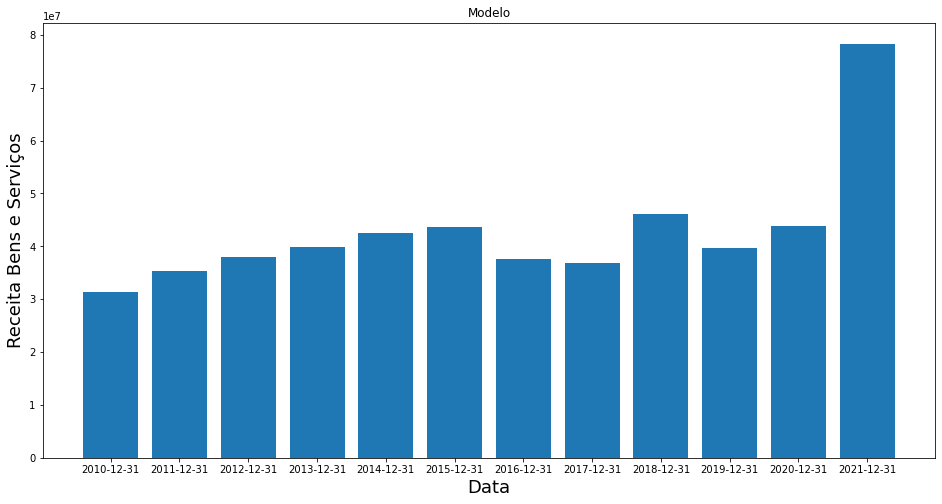

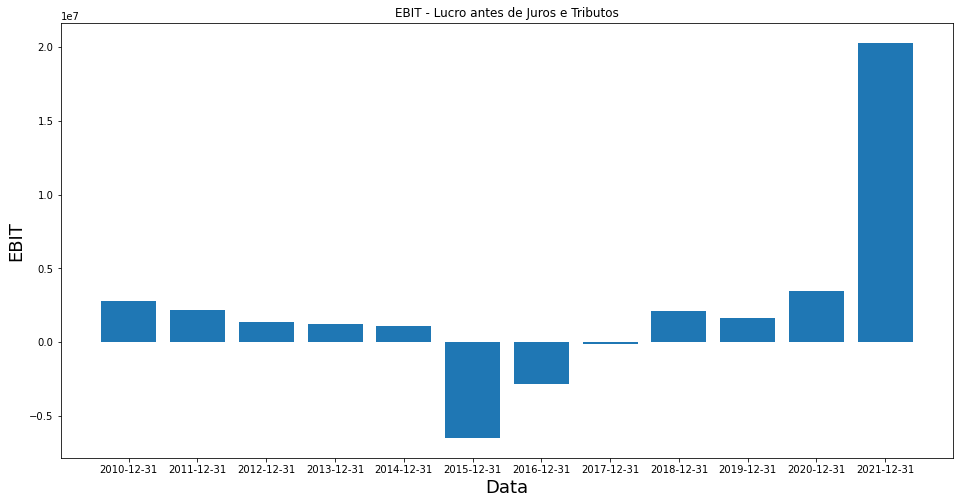

In [155]:


plt.figure(figsize =(16, 8))

plt.bar(empresa['DT_REFER'], empresa['VL_CONTA'])

plt.xlabel('Data', fontsize = 18)
plt.ylabel("Receita Bens e Serviços", fontsize = 18)
plt.title('Modelo')
plt.show()


plt.figure(figsize =(16, 8))

plt.bar(ebit['DT_REFER'], ebit['VL_CONTA'])

plt.xlabel('Data', fontsize = 18)
plt.ylabel("EBIT", fontsize = 18)
plt.title('EBIT - Lucro antes de Juros e Tributos')
plt.show()




